In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (10,8)

### Problem 1.

### A)
#### 1)

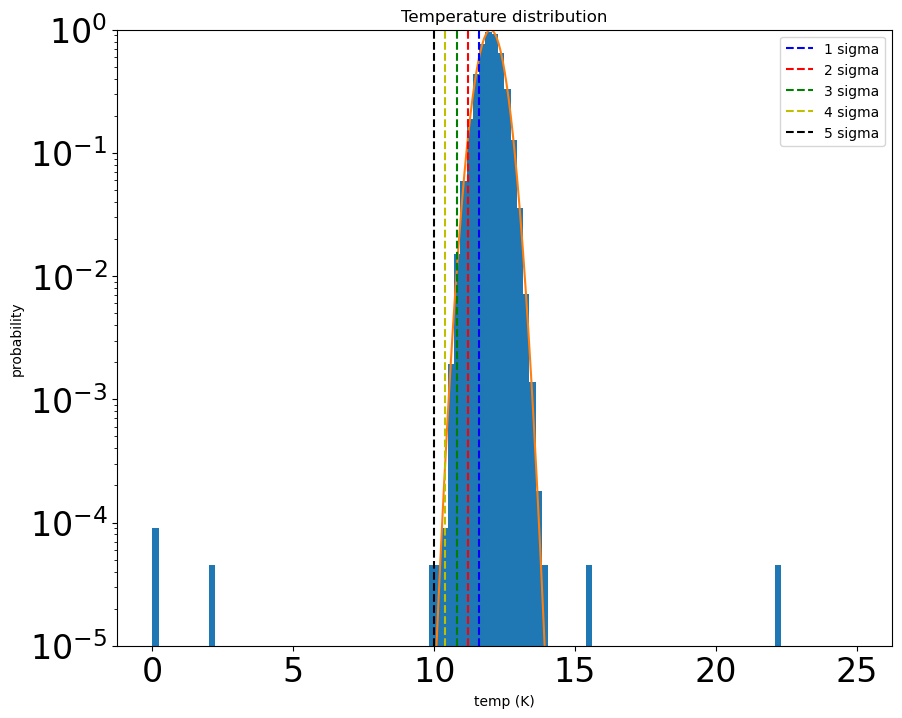

In [128]:
d_good = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
d = np.append(d_good, [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, loc=12, scale=0.4))

colors = ['b', 'r', 'g', 'y', 'k']
for i in range(1,6):
    plt.axvline(stats.norm.ppf(stats.norm.sf(i), loc=12, scale=0.4), label=f'{i} sigma', c=colors[i-1], linestyle='--')
    
plt.ylim(10e-6,1)
plt.title('Temperature distribution')
plt.xlabel('temp (K)')
plt.ylabel('probability')
plt.legend()
plt.show()

The distribution mostly follows a Gaussian distribution. By plotting at each sigma value, we can see that the bad data generally falls outside of 5 sigma.

#### 2)
Most of the bad data lies away from the central distribution, outside of the characteristic parabolic shape of the Gaussian on the log plot, so we will discard any data with a temperature that doesn't lie in that area, as it is very likely that anything outside this will be bad data, and a very low chance that it will be good data.

#### 3)
Since most of the bad data is past 5 sigma, will discard any data that lies beyond the corresponding temperature for that sigma value.

In [78]:
print(f'5 sigma = {stats.norm.ppf(stats.norm.sf(5), loc=12, scale=0.4)} or{stats.norm.ppf(stats.norm.sf(-5), loc=12, scale=0.4): 0.1f}')

5 sigma = 10.0 or 14.0


So our statistical question is "Is this data point less than 10 or greater than 14?"

#### 4)
To build our truth table, we have to count the number of points that lie between 10 and 14, and determine how many were part of the original background, and then do the same for the data outside of 10-14K. We know that there are bad data points with values 10, 10.3, 2.1, 0, 0, 15.6, 22.3, and 12.7. so the data points with values 10.3 and 12.7 will all be falsely labeled as good data.

In [84]:
good_count = 0
for n in d:
    if (n>10) and (n<14):
        good_count += 1
print(good_count)

100002


||True T| Bad T|
|---|---|---|
|My Test Good|100000|2|
|My Test Bad|0|6|

### B)

The number of omissions depends both on the statistical threshold and the number of data points. Since my choice of threshold, 5 sigma, corresponds to a probability on the order of $10^{-7}$, with even 100000 data points, it is extremely unlikely that any of our good data points lie outside of that range.

In [98]:
print(f'5 sigmma: {stats.norm.sf(5)}')
print(f'4 sigmma: {stats.norm.sf(4)}')
print(f'3 sigmma: {stats.norm.sf(3)}')

5 sigmma: 2.866515718791933e-07
4 sigmma: 3.167124183311986e-05
3 sigmma: 0.0013498980316300933


In [94]:
print(f'4 sigma = {stats.norm.ppf(stats.norm.sf(4), loc=12, scale=0.4):0.1f} or{stats.norm.ppf(stats.norm.sf(-4), loc=12, scale=0.4): 0.1f}')
print(f'3 sigma = {stats.norm.ppf(stats.norm.sf(3), loc=12, scale=0.4):0.1f} or{stats.norm.ppf(stats.norm.sf(-3), loc=12, scale=0.4): 0.1f}')
print(f'2 sigma = {stats.norm.ppf(stats.norm.sf(2), loc=12, scale=0.4):0.1f} or{stats.norm.ppf(stats.norm.sf(-2), loc=12, scale=0.4): 0.1f}')

4 sigma = 10.4 or 13.6
3 sigma = 10.8 or 13.2
2 sigma = 11.2 or 12.8


In [90]:
good_count = 0
for n in d:
    if (n>10.4) and (n<13.6):
        good_count += 1
print(f'For 4 sigma, {100000 - good_count} points are omitted')

For 4 sigma, 3 points are omitted


In [93]:
good_count = 0
for n in d:
    if (n>10.8) and (n<13.2):
        good_count += 1
print(f'For 3 sigma, {100000 - good_count} points are omitted')

For 3 sigma, 273 points are omitted


In [99]:
good_count = 0
for n in d:
    if (n>11.2) and (n<12.8):
        good_count += 1
print(f'For 2 sigma, {100000 - good_count} points are omitted')

For 2 sigma, 4509 points are omitted


As we can see, as the probability gets closer to the inverse of the order of magnitude of the number of data points, which is around 4 sigma, we start to have omissions. As it increases beyond there, many more points are omitted.

### C)

There are two errors of commission with my threshold, at 10.3 and 12.7. The first one could be removed by decreasing the threshold to 4 sigma, but the second would require a threshold of less than 2 sigma, at which point we would be losing many, many more good data points, so it would not be worth that trade off.

### Problem 2.

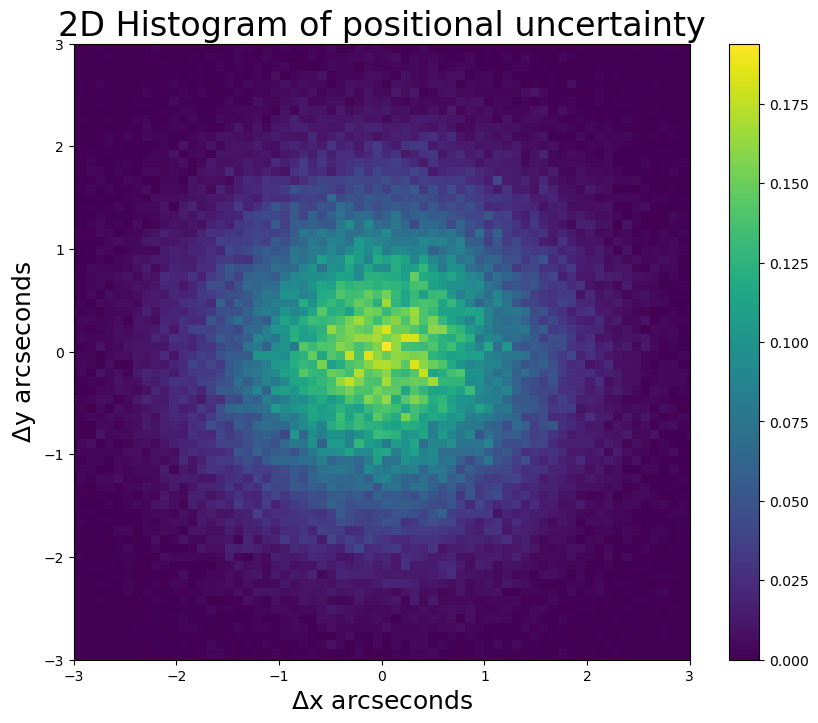

In [101]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)
plt.show()

### 1)

We want to know whether the object has moved in the x and/or y direction by at least some amount that corresponds to our detection threshold, where it would be very unlikely to be attributed to random effects such as atmospheric fluctations.

### 2)

Since we want to know the total distance, rather than x or y independently, we need $R=\sqrt{X^2+Y^2}$. The distribution for this vector is a Rayleigh distribution, so we want to find the probability by integrating from our threshold on a Rayleigh distribution. The scale of the Rayleigh distibution is given by $\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} \sigma_i^2} = \sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)} = 1$

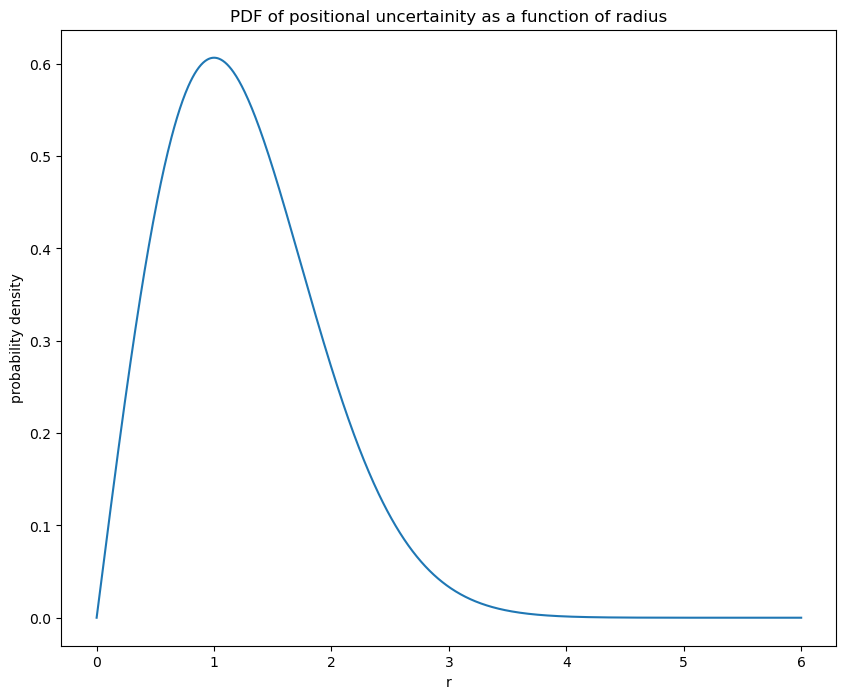

In [118]:
x = np.linspace(0,6,1000)
plt.plot(x, stats.rayleigh.pdf(x, loc=0, scale=1))
plt.title('PDF of positional uncertainity as a function of radius')
plt.xlabel('r')
plt.ylabel('probability density')
plt.show()

### 3)

In [104]:
print(f'The probability for 5 sigma is {stats.norm.sf(5):0.3e}.')

The probability for 5 sigma is 2.867e-07.


To get the needed displacement, we plug the probability for 5 sigma into the inverse survival function for a Rayleigh distribution.

In [119]:
dr = stats.rayleigh.isf(stats.norm.sf(5))
print(f'The minimum distance for a detection is {dr:0.3f} arcseconds')

The minimum distance for a detection is 5.489 arcseconds


### Problem 3.

### 1)

We are asking how many fewer cosmic rays we are recieving than we would at an unobscured patch of sky, so we want to know the probability that the background could have a value as low as our signal or less.

### 2)

With a normal rate of 1 cosmic ray per minute, with 8 hours, or 480 minutes, per day over 15 days, our total background would be the sum of 7200 Poisson distributions with an average value of 1, which is the same as a Poisson distribution with a mean of 7200 cosmic rays. To find the probability, integrate the distribution from negative infinity to our value of 6800 cosmic rays. Since it's a discrete distribution, we can just add up all the values up to that point.

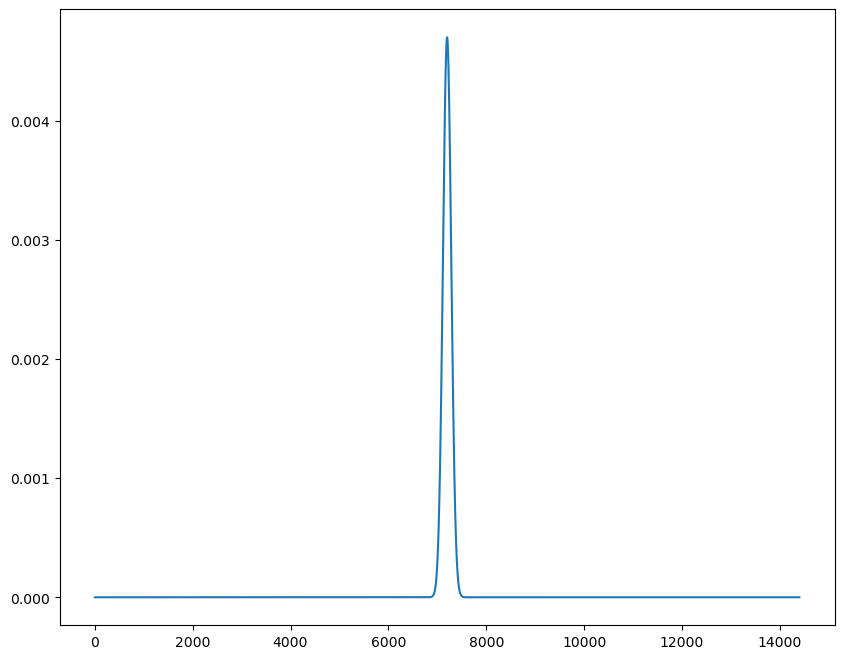

In [125]:
mu = 7200
x = np.arange(0, 14400)
bkg = stats.poisson.pmf(x, mu)
plt.plot(bkg)
plt.xlabel()

In [133]:
p = sum(bkg[:6799])
print(f'The probability of the background producing 6800 or fewer cosmic rays during the observation is {p:0.3e}')

The probability of the background producing 6800 or fewer cosmic rays during the observation is 8.996e-07


### 3)

To find the sigma value, we just need to plug that probability into the ppf() function for a normal distribution.

In [137]:
sigma = abs(stats.norm.ppf(p))

print(f'The probability of {p:.3e} gives a value of {sigma:0.3} sigma.')

The probability of 8.996e-07 gives a value of 4.77 sigma.
